In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Weather API Key
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Impeprial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Impeprial&appid=eec9a707f9a779d5b6765c629d18cc50


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mongo
Processing Record 2 of Set 1 | chumikan
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | trairi
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | hirara
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | karaul
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | mahajanga
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | el faiyum
City not found. Skipping...
Processing Record 21 of Set 1 | amalapuram
Processing Record 22 of Set 1

Processing Record 35 of Set 4 | northam
Processing Record 36 of Set 4 | tuatapere
Processing Record 37 of Set 4 | zhanakorgan
Processing Record 38 of Set 4 | fazilka
Processing Record 39 of Set 4 | taburi
City not found. Skipping...
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | marsh harbour
Processing Record 42 of Set 4 | ishigaki
Processing Record 43 of Set 4 | linxia
Processing Record 44 of Set 4 | saquarema
Processing Record 45 of Set 4 | college
Processing Record 46 of Set 4 | san quintin
Processing Record 47 of Set 4 | port hawkesbury
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | namuac
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | cheremukhovo
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | alamosa
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | sumbawan

Processing Record 28 of Set 8 | mpongwe
Processing Record 29 of Set 8 | sorland
Processing Record 30 of Set 8 | abong mbang
Processing Record 31 of Set 8 | mucurapo
Processing Record 32 of Set 8 | tucupita
Processing Record 33 of Set 8 | opuwo
Processing Record 34 of Set 8 | dalby
Processing Record 35 of Set 8 | husavik
Processing Record 36 of Set 8 | booue
Processing Record 37 of Set 8 | hinton
Processing Record 38 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 39 of Set 8 | konstantinovka
Processing Record 40 of Set 8 | solnechnyy
Processing Record 41 of Set 8 | lerma
Processing Record 42 of Set 8 | rey bouba
Processing Record 43 of Set 8 | kungurtug
Processing Record 44 of Set 8 | forestville
Processing Record 45 of Set 8 | sarakhs
Processing Record 46 of Set 8 | nosy varika
Processing Record 47 of Set 8 | sheridan
Processing Record 48 of Set 8 | seoul
Processing Record 49 of Set 8 | aykhal
Processing Record 50 of Set 8 | kudahuvadhoo
Processing Record 1 of Set 

Processing Record 15 of Set 12 | tabuk
Processing Record 16 of Set 12 | poltavka
Processing Record 17 of Set 12 | buchanan
Processing Record 18 of Set 12 | bandarbeyla
Processing Record 19 of Set 12 | bambamarca
Processing Record 20 of Set 12 | luebo
Processing Record 21 of Set 12 | altamont
Processing Record 22 of Set 12 | sayat
Processing Record 23 of Set 12 | imbituba
Processing Record 24 of Set 12 | chekhov
Processing Record 25 of Set 12 | mozarlandia
Processing Record 26 of Set 12 | wilmington
Processing Record 27 of Set 12 | kiwira
Processing Record 28 of Set 12 | nanortalik
Processing Record 29 of Set 12 | urusha
Processing Record 30 of Set 12 | castlegar
Processing Record 31 of Set 12 | nueva guinea
Processing Record 32 of Set 12 | laizhou
Processing Record 33 of Set 12 | itoman
Processing Record 34 of Set 12 | kokoda
Processing Record 35 of Set 12 | rungata
City not found. Skipping...
Processing Record 36 of Set 12 | ruteng
Processing Record 37 of Set 12 | kismayo
Processing R

In [7]:
len(city_data)

556

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mongo,12.1844,18.6930,304.39,11,31,2.81,TD,2021-04-08 23:00:37
1,Chumikan,54.7183,135.3150,265.78,91,95,2.76,RU,2021-04-08 23:00:37
2,Albany,42.6001,-73.9662,296.15,30,1,3.09,US,2021-04-08 23:00:38
3,Trairi,-3.2778,-39.2689,300.06,81,60,4.84,BR,2021-04-08 23:00:38
4,Sao Joao Da Barra,-21.6403,-41.0511,296.82,75,19,4.87,BR,2021-04-08 22:56:36
5,Bredasdorp,-34.5322,20.0403,287.15,100,7,1.03,ZA,2021-04-08 22:57:21
6,Dikson,73.5069,80.5464,255.52,80,42,5.13,RU,2021-04-08 23:00:38
7,Mar Del Plata,-38.0023,-57.5575,292.04,94,75,6.17,AR,2021-04-08 22:59:07
8,Busselton,-33.6500,115.3333,286.02,72,0,6.60,AU,2021-04-08 23:00:39
9,Hirara,24.8000,125.2833,293.15,83,75,5.15,JP,2021-04-08 23:00:39


In [11]:
# Re-order columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mongo,TD,2021-04-08 23:00:37,12.1844,18.6930,304.39,11,31,2.81
1,Chumikan,RU,2021-04-08 23:00:37,54.7183,135.3150,265.78,91,95,2.76
2,Albany,US,2021-04-08 23:00:38,42.6001,-73.9662,296.15,30,1,3.09
3,Trairi,BR,2021-04-08 23:00:38,-3.2778,-39.2689,300.06,81,60,4.84
4,Sao Joao Da Barra,BR,2021-04-08 22:56:36,-21.6403,-41.0511,296.82,75,19,4.87
5,Bredasdorp,ZA,2021-04-08 22:57:21,-34.5322,20.0403,287.15,100,7,1.03
6,Dikson,RU,2021-04-08 23:00:38,73.5069,80.5464,255.52,80,42,5.13
7,Mar Del Plata,AR,2021-04-08 22:59:07,-38.0023,-57.5575,292.04,94,75,6.17
8,Busselton,AU,2021-04-08 23:00:39,-33.6500,115.3333,286.02,72,0,6.60
9,Hirara,JP,2021-04-08 23:00:39,24.8000,125.2833,293.15,83,75,5.15


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

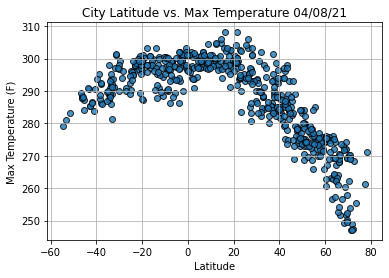

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

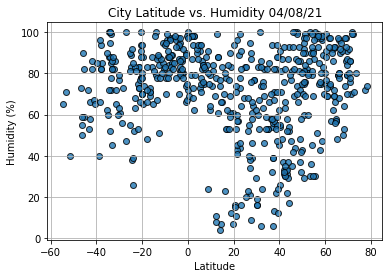

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()